# Машинное обучение. Лабораторная работа №1.
Выполнила: *Девятерикова Александра Владимировна*  
Группа: *М8О-301Б-18*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier

## Датасет
Данный датасет содержит информацию о португальском красном вине "Vinho Verde". Здесь указаны только физико-химические (входные) и качественные (выходные) данные.

In [2]:
data = pd.read_csv('winequality-red.csv')
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Описание признаков
#### Входные данные:
1. fixed acidity (фиксированная кислотность) - вещественный признак.
2. volatile acidity (летучая кислотность) - вещественный признак.
3. citric acid (лимонная кислота) - вещественный признак.
4. residual sugar (остаточный сахар) - вещественный признак.
5. chlorides (хлориды) - вещественный признак.
6. free sulfur dioxide (свободный диоксид серы) - вещественный признак.
7. total sulfur dioxide (общий диоксид серы) - вещественный признак.
8. density (плотность) - вещественный признак.
9. pH (водородный показатель) - вещественный признак.
10. sulphates (сульфаты) - вещественный признак.
11. alcohol (алкоголь) - вещественный признак.

#### Выходные данные:

quality (качество) - от 0 до 10.

### Постановка задачи
Из физико-химических данных вина, сделать вывод о его качестве.

## Анализ датасета
Датасет не содержит пропусков

In [3]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

Сильной корреляции между признаками нет

In [4]:
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

Графики распределений значений признаков:

/home/alexandra/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

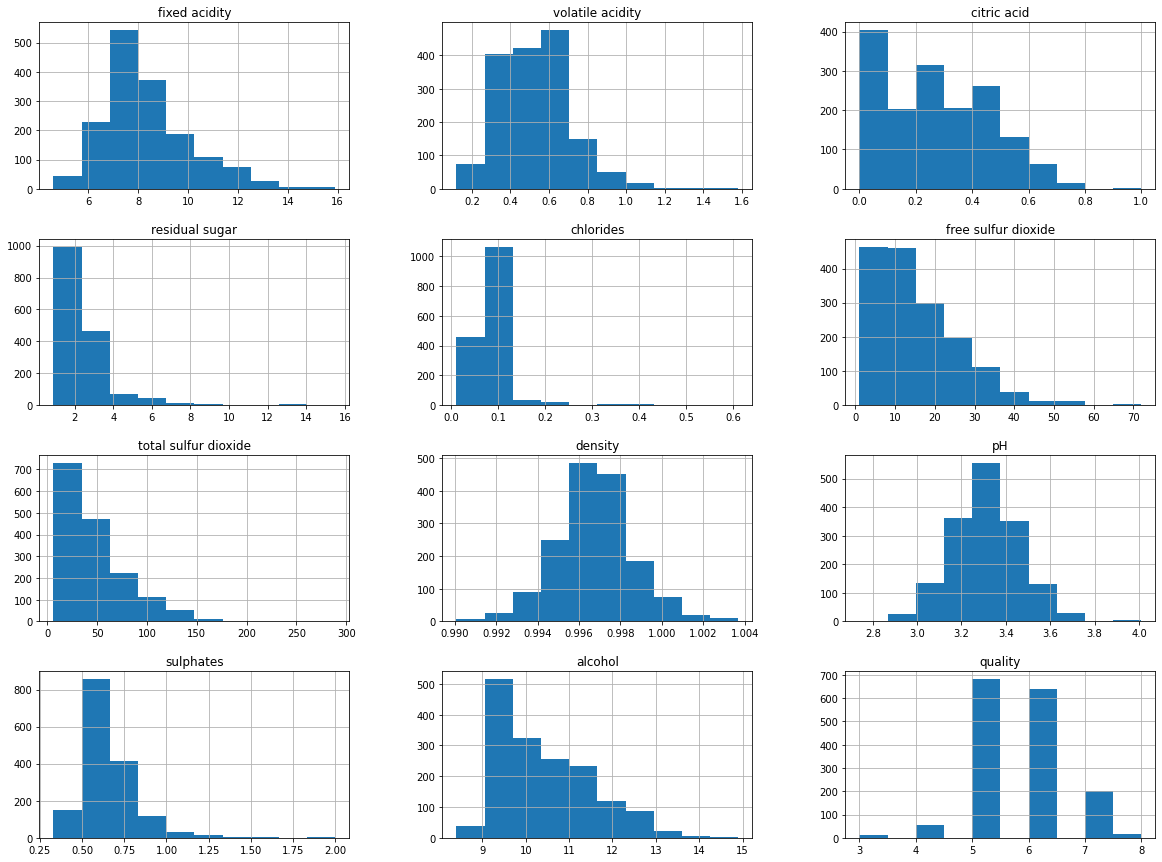

In [5]:
data.hist(figsize=(20, 15))

## Алгоритм KNN

### Подготовка датасета
Отнормируем значения признаков

In [9]:
design_matrix, target = data.drop(columns=['quality']).to_numpy(), np.array(data['quality'])

In [10]:
design_matrix

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [12]:
target

array([5, 5, 5, ..., 6, 5, 6])

In [13]:
cnt_signs = design_matrix.shape[1]
max_values = np.zeros(cnt_signs)
for i in range(cnt_signs):
    max_in_clmn = design_matrix[:, i].max()
    max_values[i] = max_in_clmn
    design_matrix[:, i] /= max_in_clmn

Первый класс выходных данных $-$ качество вина более 5  
Второй класс выходных данных $-$ качество вина не более 5

In [14]:
print(data[data['quality'] > 5].shape[0] / data['quality'].shape[0] * 100)
print(data[data['quality'] <= 5].shape[0] / data['quality'].shape[0] * 100)

53.47091932457786
46.52908067542214


In [15]:
for index in range(len(target)):
    if target[index] > 5:
        target[index] = 1
    else:
        target[index] = 0

In [16]:
target

array([0, 0, 0, ..., 1, 0, 1])

In [17]:
def euclidean(vec1, vec2):
    return sum([(x - y) ** 2 for x, y in zip(vec1, vec2)]) ** 0.5

### Разбиение на обучающую и тестовую выборки

In [18]:
features_train, features_test, target_train, target_test = train_test_split(design_matrix, target, 
                                                                            test_size=0.2, random_state=24)

In [19]:
class KNN:
    
    def __init__(self, design_matrix, target):
        self.design_matrix = design_matrix
        self.target = target
        
    
    def predict(self, obj_array, k, metric):
        neighbours = np.zeros((self.design_matrix.shape[0], 2))
        for idx in range(self.design_matrix.shape[0]):
            neighbours[idx] = (metric(obj_array, self.design_matrix[idx]), self.target[idx])
        sorted_k_neighbours = sorted(neighbours, key=lambda x: x[0])[:k]
        cnt_0, cnt_1 = 0, 0
        for _, target in sorted_k_neighbours:
            if target == 1:
                cnt_1 += 1
            else:
                cnt_0 += 1
        
        return 1 if cnt_1 > cnt_0 else 0
    
    
    def score(self, features, target, k, metric):
        right_predict_number = 0
        for idx in range(features.shape[0]):
            if self.predict(features[idx], k, metric) == target[idx]:
                right_predict_number += 1
        return right_predict_number / target.shape[0]

### Проверка точности

In [20]:
knn_obj = KNN(features_train, target_train)
print('Результат собственной реализации KNN на обучающей выборке: ', knn_obj.score(features_train, target_train, 3,
                                                                                   euclidean))
print('Результат собственной реализации KNN на тестовой выборке: ', knn_obj.score(features_test, target_test, 3,
                                                                                  euclidean))

Результат собственной реализации KNN на обучающей выборке:  0.8663017982799062
Результат собственной реализации KNN на тестовой выборке:  0.71875


In [21]:
knn_obj = KNN(features_train, target_train)
print('Результат собственной реализации KNN на обучающей выборке: ', knn_obj.score(features_train, target_train, 3,
                                                                                   euclidean))
print('Результат собственной реализации KNN на тестовой выборке: ', knn_obj.score(features_test, target_test, 3,
                                                                                  euclidean))

Результат собственной реализации KNN на обучающей выборке:  0.8663017982799062
Результат собственной реализации KNN на тестовой выборке:  0.71875


## Наивный байесовский классификатор
Поскольку признаки являются непрерывными величинами, то будем использовать нормальное распределение.

In [22]:
class NormalDistribution:
    
    def __init__(self, mean, std):
        self.mean = mean
        # standart deviation
        self.std = std
    
    
    def probability_density(self, value):
        return 1 / (self.std * (2 * np.pi) ** 0.5 * np.exp((value - self.mean) ** 2 / (2 * self.std ** 2)))

In [24]:
class NaiveBayes:
    
    def fit(self, X, Y):
        self.label_probabilities = {
            0: len(Y[Y == 0]) / len(Y),
            1: len(Y[Y == 1]) / len(Y)
        }
        self.conditional_probabilities = {}
        for value in (0, 1):
            probabilities = []
            for column in range(X.shape[1]):
                x = X[Y == value, column]
                probabilities.append(NormalDistribution(x.mean(axis=0), x.std(axis=0)))
            self.conditional_probabilities[value] = probabilities
            
    
    def predict(self, feature):
        label_probabilities = {}
        for value in (0, 1):
            conditional_feature_probability = 0
            for i in range(feature.shape[0]):
                conditional_feature_probability += np.log(self.conditional_probabilities[value][i]
                                                          .probability_density(feature[i]))
            label_probabilities[value] = np.log(self.label_probabilities[value]) + conditional_feature_probability
        return 1 if label_probabilities[1] > label_probabilities[0] else 0


    def score(self, features, target):
        rigth_predict_number = 0
        for i in range(features.shape[0]):
            if self.predict(features[i]) == target[i]:
                rigth_predict_number += 1

        return rigth_predict_number / target.shape[0]

In [25]:
design_matrix, target = data.drop(columns=['quality']).to_numpy(), np.array(data['quality'])

In [26]:
for index in range(len(target)):
    if target[index] > 5:
        target[index] = 1
    else:
        target[index] = 0

In [27]:
target

array([0, 0, 0, ..., 1, 0, 1])

In [28]:
features_train, features_test, target_train, target_test = train_test_split(design_matrix, target, 
                                                                            test_size=0.2, random_state=24)

In [29]:
nb = NaiveBayes()
nb.fit(features_train, target_train)
print('Результат собственной реализации наивного байесовского классификатора на обучающей выборке: ', 
      nb.score(features_train, target_train))
print('Результат собственной реализации наивного байесовского классификатора на тестовой выборке: ', 
      nb.score(features_test, target_test))

Результат собственной реализации наивного байесовского классификатора на обучающей выборке:  0.7404222048475372
Результат собственной реализации наивного байесовского классификатора на тестовой выборке:  0.70625


In [30]:

sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(features_train, target_train)
print('Результат sklearn реализации наивного байесовского классификатора на обучающей выборке: {}'
      .format(sklearn_nb.score(features_train, target_train)))
print('Результат sklearn реализации наивного байесовского классификатора на тестовой выборке: {}'
      .format(sklearn_nb.score(features_test, target_test)))

Результат sklearn реализации наивного байесовского классификатора на обучающей выборке: 0.7372947615324472
Результат sklearn реализации наивного байесовского классификатора на тестовой выборке: 0.7125
